Importing And Loading Data

In [1]:
import pandas as pd
titanic_df = pd.read_csv("D:\Downloads\Titanic-Dataset.csv")


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_10048\420208337.py:2: SyntaxWarning: invalid escape sequence '\D'
  titanic_df = pd.read_csv("D:\Downloads\Titanic-Dataset.csv")


Initial Exploration of the Data

In [7]:
print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.describe())
print(titanic_df.isna().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Some Visualizations about the Data

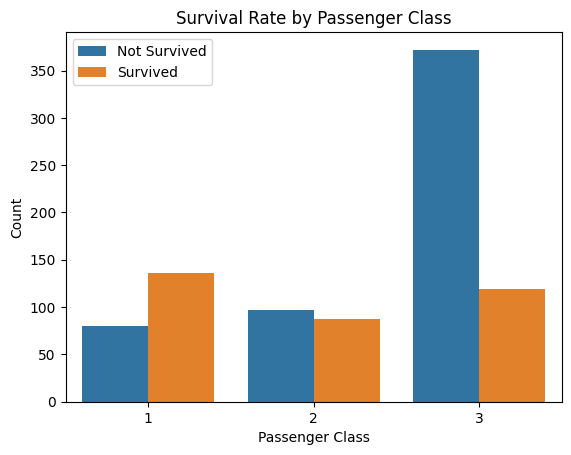

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


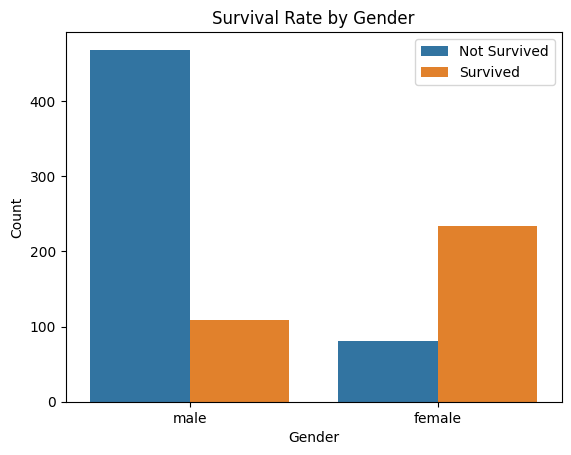

In [10]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

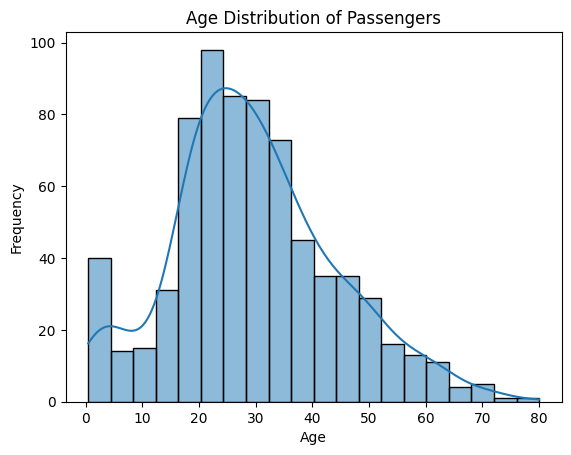

In [11]:
sns.histplot(titanic_df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10048\606979045.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 0, 'Age'].dropna(), color='red', label='Not Survived', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10048\606979045.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 1, 'Age'].dropna(), color='green', label='Survived', shade=True)


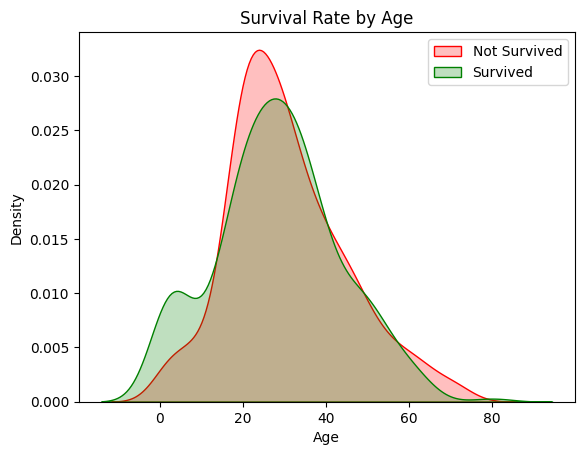

In [12]:
sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 0, 'Age'].dropna(), color='red', label='Not Survived', shade=True)
sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 1, 'Age'].dropna(), color='green', label='Survived', shade=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

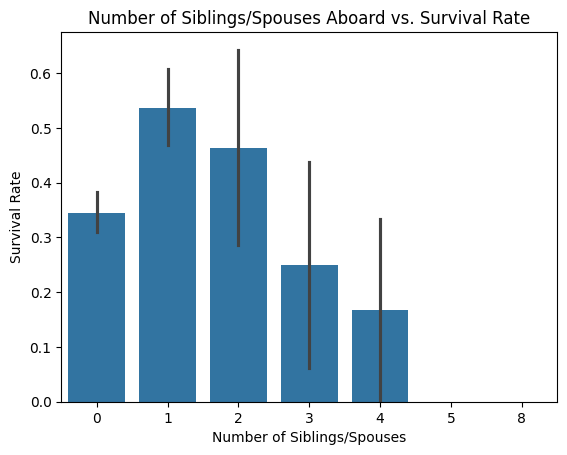

In [13]:
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Number of Siblings/Spouses Aboard vs. Survival Rate')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

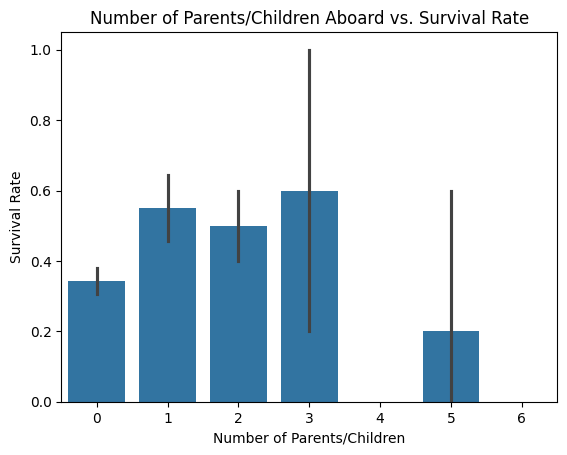

In [14]:
sns.barplot(x='Parch', y='Survived', data=titanic_df)
plt.title('Number of Parents/Children Aboard vs. Survival Rate')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()


Handling Missing Values in the Data

In [15]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10048\3999788930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10048\3999788930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Converting Categorical Data to Numerical

In [16]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True, dtype=int)

Future Engineering

In [17]:
titanic_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 0).astype(int)


Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Building the Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Hyper Parameters Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]})

In [22]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))


Test set accuracy: 0.8044692737430168
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

